# ネットワークを可視化する

- 普通に可視化すると重たすぎるので、interactionが1のものを除外して可視化する


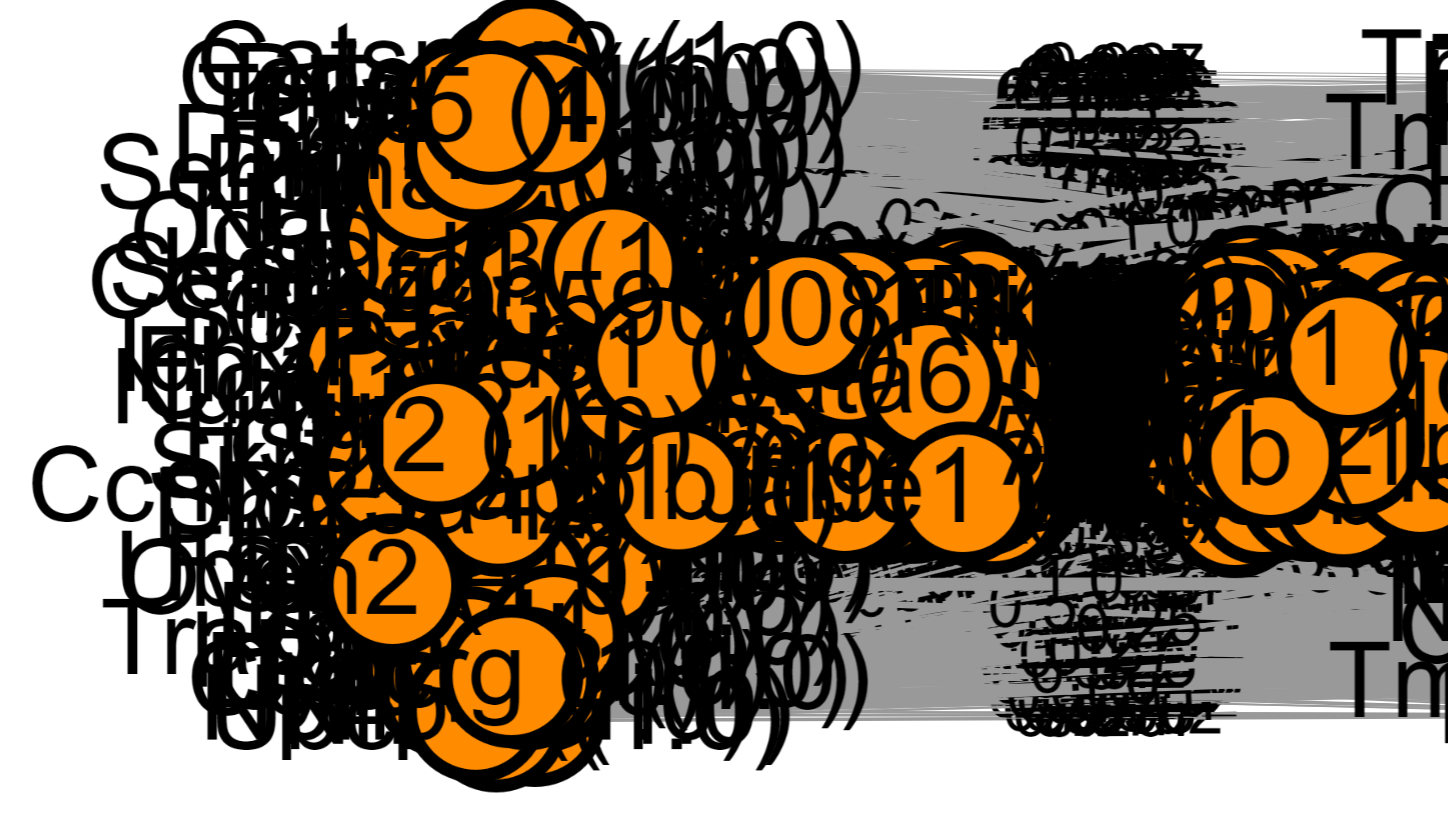

In [1]:
# Move up to top directory
import os
os.getcwd()
os.chdir('../')
os.getcwd()

'/mnt/e/impc-genes_with_similar_phenotypes'

In [2]:
from pathlib import Path
from collections import defaultdict
from itertools import combinations
import csv
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
import dash
import dash_cytoscape as cyto
import plotly.graph_objects as go
from dash import dcc, html
from dash.dependencies import Input, Output

In [4]:
path_network = Path("data", "network.csv")
df_network = pd.read_csv(path_network)
data = df_network.to_dict(orient="records")

In [5]:
data[:3]

[{'from': 'Dynlrb2', 'to': 'Camsap3', 'node_size': 1.0, 'edge_size': 0.04},
 {'from': 'Dynlrb2', 'to': 'Vgf', 'node_size': 1.0, 'edge_size': 0.059},
 {'from': 'Dynlrb2', 'to': 'Fbxo38', 'node_size': 1.0, 'edge_size': 0.154}]

In [6]:

# Create unique nodes and determine their sizes
node_sizes = {}
max_size = 0
min_size = float("inf")
for entry in data:
    for node in [entry["from"], entry["to"]]:
        if node not in node_sizes:
            node_sizes[node] = entry["node_size"]
        else:
            node_sizes[node] = max(node_sizes[node], entry["node_size"])
        max_size = max(max_size, node_sizes[node])
        min_size = min(min_size, node_sizes[node])


In [7]:
# Function to interpolate colors between yellow and dark orange
def interpolate_color(size, min_size, max_size):
    ratio = (size - min_size) / (max_size - min_size) if max_size != min_size else 1
    yellow = [255, 255, 0]  # Yellow (RGB)
    dark_orange = [255, 140, 0]  # Dark Orange (RGB)
    color = [int(yellow[i] + (dark_orange[i] - yellow[i]) * ratio) for i in range(3)]
    return f"rgb({color[0]}, {color[1]}, {color[2]})"

